In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data Checks

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories in 'Gender': ")
print(list(df["gender"].unique()))
print()

print("Categories in 'Race/Ethinicity': ")
print(list(df["race_ethnicity"].unique()))
print()

print("Categories in 'Parental level of Education': ")
print(list(df["parental_level_of_education"].unique()))
print()

print("Categories in 'Lunch': ")
print(list(df["lunch"].unique()))
print()

print("Categories in 'Test Preparation Course': ")
print(list(df["test_preparation_course"].unique()))

Categories in 'Gender': 
['female', 'male']

Categories in 'Race/Ethinicity': 
['group B', 'group C', 'group A', 'group D', 'group E']

Categories in 'Parental level of Education': 
["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']

Categories in 'Lunch': 
['standard', 'free/reduced']

Categories in 'Test Preparation Course': 
['none', 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("No of Numerical Features: ", len(numeric_features))
print("No of Catgorical Features: ", len(categorical_features))

No of Numerical Features:  8
No of Catgorical Features:  0


### New Columns for Total Score and Average Score

In [12]:
df["total_score"] = df["math_score"] + df["writing_score"] + df["reading_score"]
df["average_score"] = round(df["total_score"]/3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [13]:
math_full = df[df["math_score"]==100]["average_score"].count()
reading_full = df[df["reading_score"]==100]["average_score"].count()
writing_full = df[df["writing_score"]==100]["average_score"].count()

print("No of Students with full score in Maths: ", math_full)
print("No of Students with full score in Reading: ", reading_full)
print("No of Students with full score in Writing: ", writing_full)

No of Students with full score in Maths:  7
No of Students with full score in Reading:  17
No of Students with full score in Writing:  14


In [14]:
math_less_than_20 = df[df["math_score"]<=20]["average_score"].count()
reading_less_than_20 = df[df["reading_score"]<=20]["average_score"].count()
writing_less_than_20 = df[df["writing_score"]<=20]["average_score"].count()

print("No of Students with less than 20 score in Maths: ", math_less_than_20)
print("No of Students with less than 20 score in Reading: ", reading_less_than_20)
print("No of Students with less than 20 score in Writing: ", writing_less_than_20)

No of Students with less than 20 score in Maths:  4
No of Students with less than 20 score in Reading:  1
No of Students with less than 20 score in Writing:  3


### Visualizations

<Axes: xlabel='average_score', ylabel='Count'>

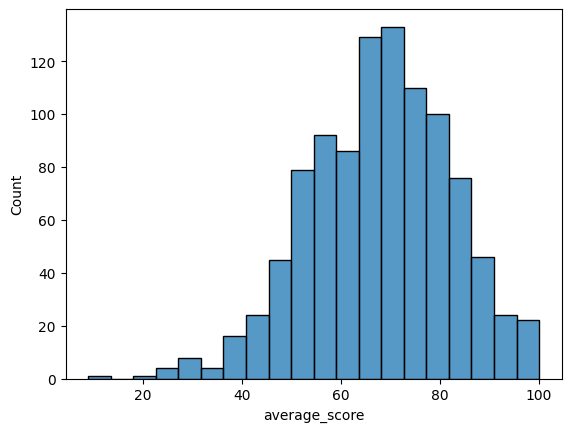

In [15]:
sns.histplot(df["average_score"],bins=20)

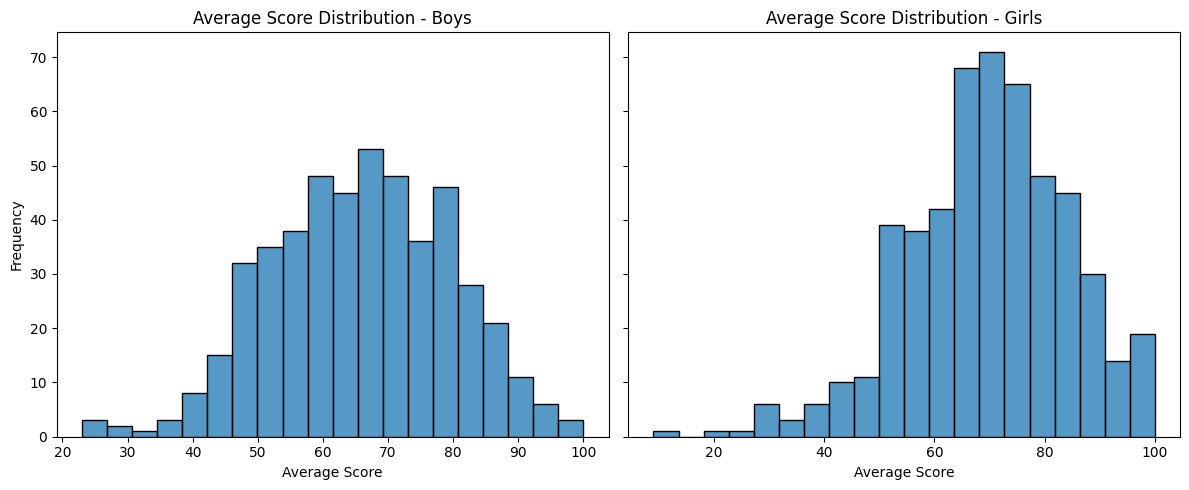

In [16]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.histplot(data=df[df["gender"] == "male"],x="average_score",bins=20,ax=axes[0])
axes[0].set_title("Average Score Distribution - Boys")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df[df["gender"] == "female"],x="average_score",bins=20,ax=axes[1])
axes[1].set_title("Average Score Distribution - Girls")
axes[1].set_xlabel("Average Score")

plt.tight_layout()
plt.show()

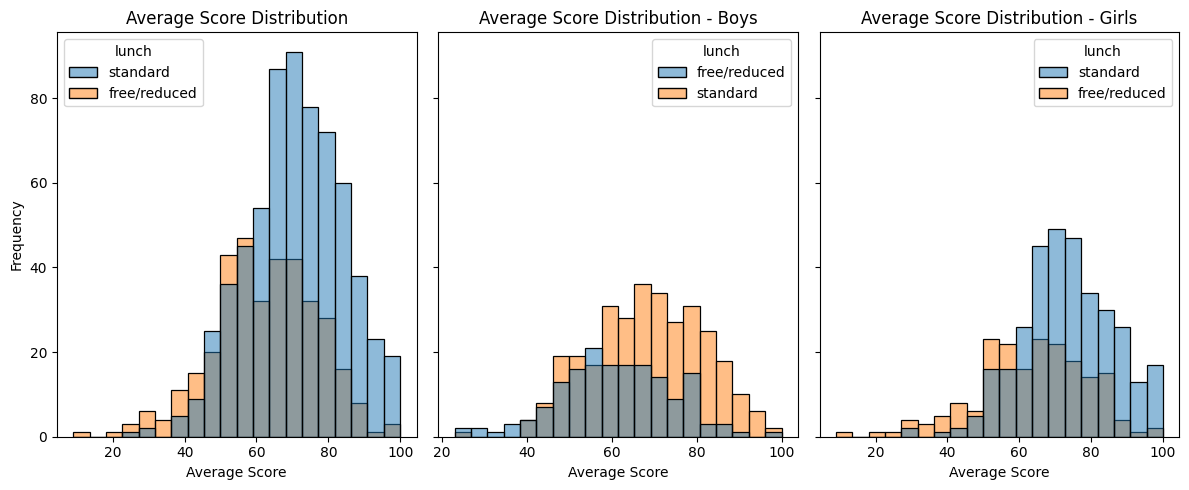

In [17]:
fig,axes = plt.subplots(1,3,figsize=(12,5),sharey=True)

sns.histplot(data=df,x="average_score",bins=20,ax=axes[0],hue="lunch")
axes[0].set_title("Average Score Distribution")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df[df["gender"] == "male"],x="average_score",bins=20,ax=axes[1],hue="lunch")
axes[1].set_title("Average Score Distribution - Boys")
axes[1].set_xlabel("Average Score")


sns.histplot(data=df[df["gender"] == "female"],x="average_score",bins=20,ax=axes[2],hue="lunch")
axes[2].set_title("Average Score Distribution - Girls")
axes[2].set_xlabel("Average Score")

plt.tight_layout()
plt.show()

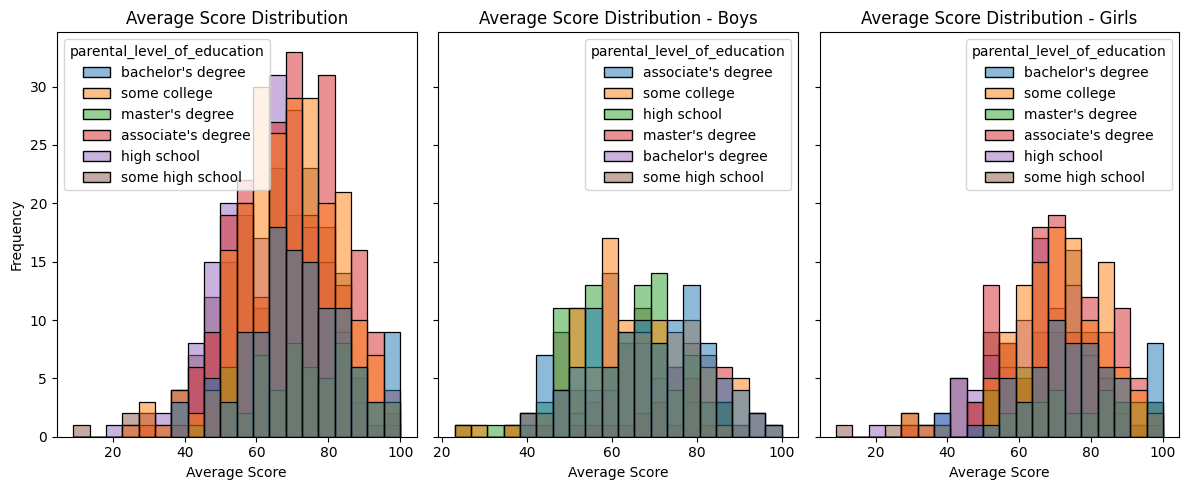

In [18]:
fig,axes = plt.subplots(1,3,figsize=(12,5),sharey=True)

sns.histplot(data=df,x="average_score",bins=20,ax=axes[0],hue="parental_level_of_education")
axes[0].set_title("Average Score Distribution")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df[df["gender"] == "male"],x="average_score",bins=20,ax=axes[1],hue="parental_level_of_education")
axes[1].set_title("Average Score Distribution - Boys")
axes[1].set_xlabel("Average Score")


sns.histplot(data=df[df["gender"] == "female"],x="average_score",bins=20,ax=axes[2],hue="parental_level_of_education")
axes[2].set_title("Average Score Distribution - Girls")
axes[2].set_xlabel("Average Score")

plt.tight_layout()
plt.show()

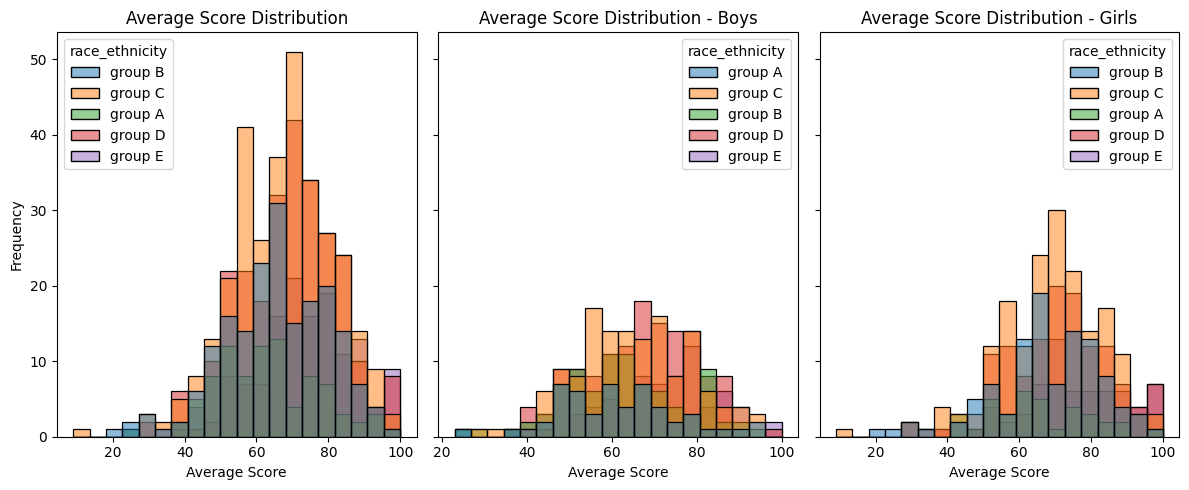

In [19]:
fig,axes = plt.subplots(1,3,figsize=(12,5),sharey=True)

sns.histplot(data=df,x="average_score",bins=20,ax=axes[0],hue="race_ethnicity")
axes[0].set_title("Average Score Distribution")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df[df["gender"] == "male"],x="average_score",bins=20,ax=axes[1],hue="race_ethnicity")
axes[1].set_title("Average Score Distribution - Boys")
axes[1].set_xlabel("Average Score")


sns.histplot(data=df[df["gender"] == "female"],x="average_score",bins=20,ax=axes[2],hue="race_ethnicity")
axes[2].set_title("Average Score Distribution - Girls")
axes[2].set_xlabel("Average Score")

plt.tight_layout()
plt.show()

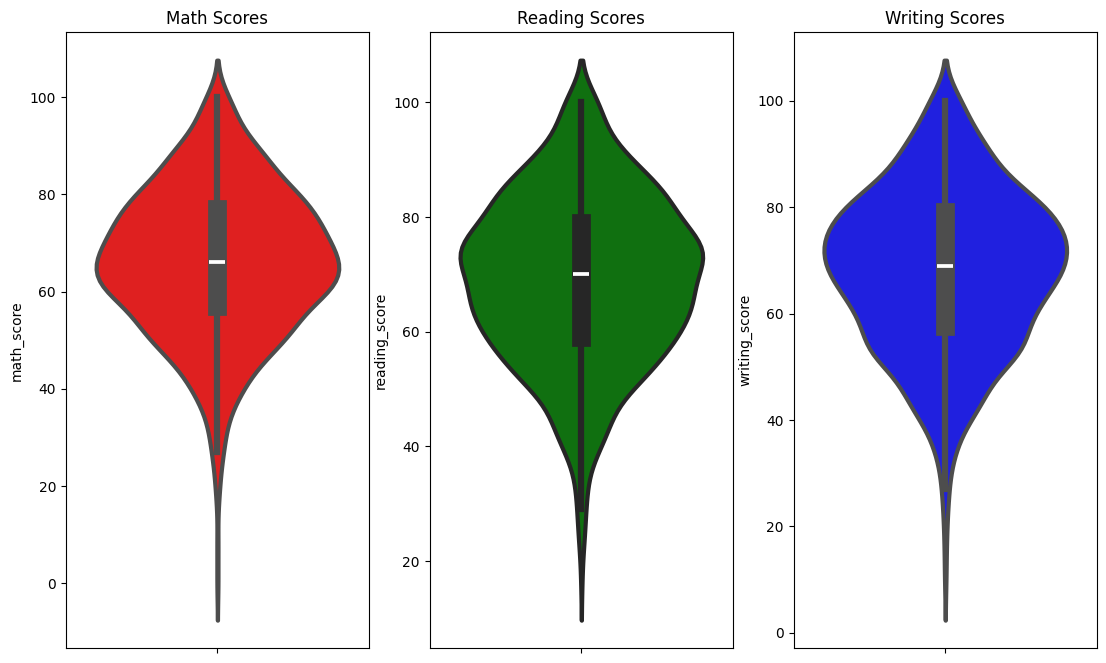

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(y="math_score",data=df,color="red",linewidth=3)
plt.subplot(1, 4, 2)
plt.title("Reading Scores")
sns.violinplot(y="reading_score",data=df,color="green",linewidth=3)
plt.subplot(1, 4, 3)
plt.title("Writing Scores")
sns.violinplot(y="writing_score",data=df,color="blue",linewidth=3)
plt.show()

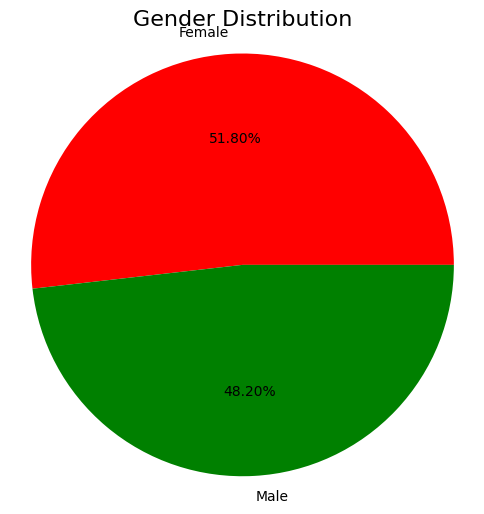

In [21]:
plt.figure(figsize=(6,6))

size = df["gender"].value_counts()
labels = ["Female","Male"]
colors = ["red","green"]

plt.pie(size,labels=labels,colors=colors,autopct="%.2f%%")
plt.title("Gender Distribution",fontsize=16)
plt.axis("equal")
plt.show()

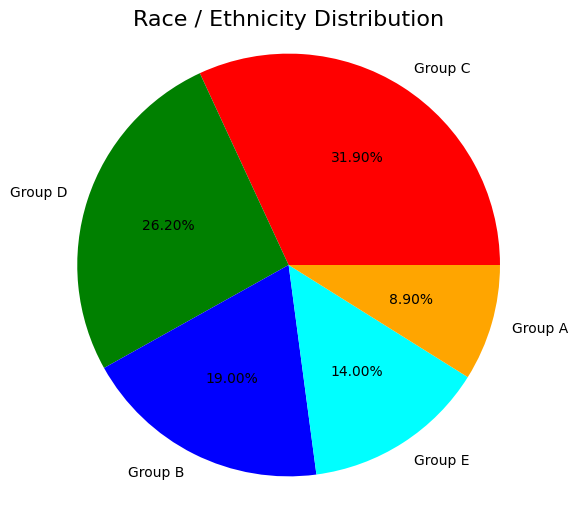

In [22]:
plt.figure(figsize=(6, 6))

size = df["race_ethnicity"].value_counts()
labels = ["Group C", "Group D", "Group B", "Group E", "Group A"]
colors = ["red", "green", "blue", "cyan", "orange"]

plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Race / Ethnicity Distribution", fontsize=16)
plt.axis("equal")
plt.show()

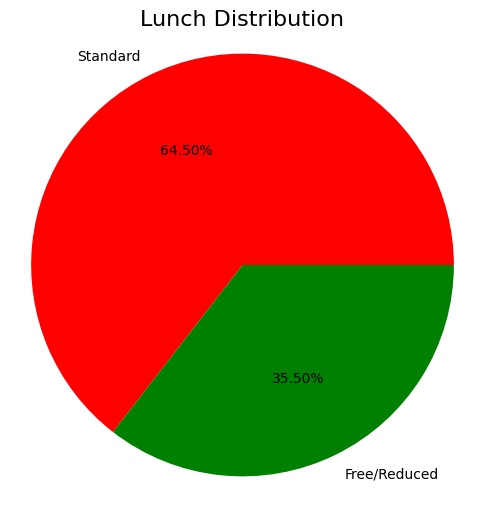

In [23]:
plt.figure(figsize=(6, 6))

size = df["lunch"].value_counts()
labels = ["Standard", "Free/Reduced"]
colors = ["red", "green"]

plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Lunch Distribution", fontsize=16)
plt.axis("equal")
plt.show()

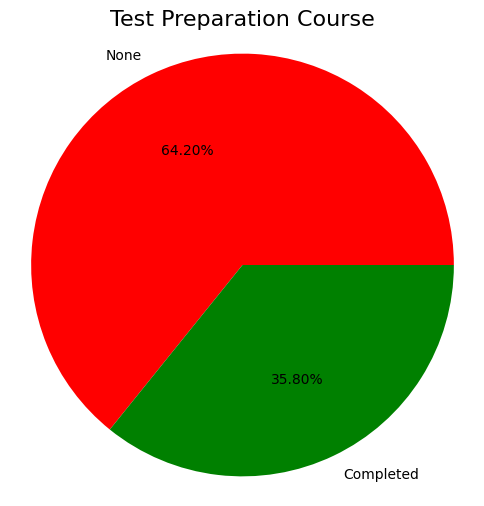

In [24]:
plt.figure(figsize=(6,6))

size = df["test_preparation_course"].value_counts()
labels = ["None", "Completed"]
colors = ["red", "green"]

plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Test Preparation Course", fontsize=16)
plt.axis("equal")
plt.show()

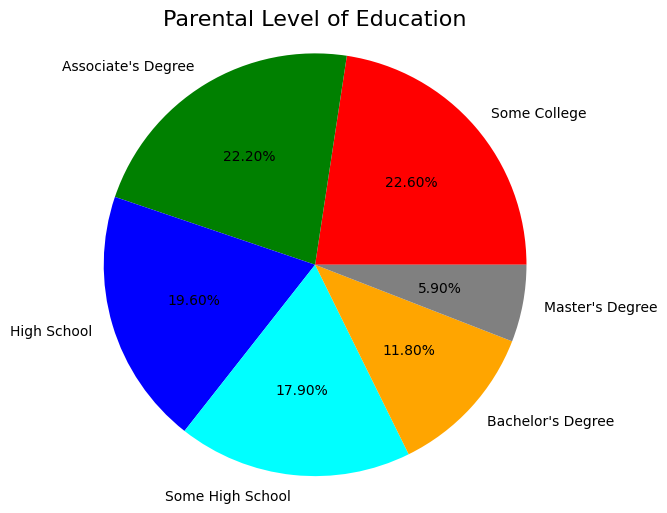

In [25]:
plt.figure(figsize=(6,6))

size = df["parental_level_of_education"].value_counts()
labels = [
    "Some College", "Associate's Degree", "High School",
    "Some High School", "Bachelor's Degree", "Master's Degree"
]
colors = ["red", "green", "blue", "cyan", "orange", "grey"]

plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Parental Level of Education", fontsize=16)
plt.axis("equal")
plt.show()

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

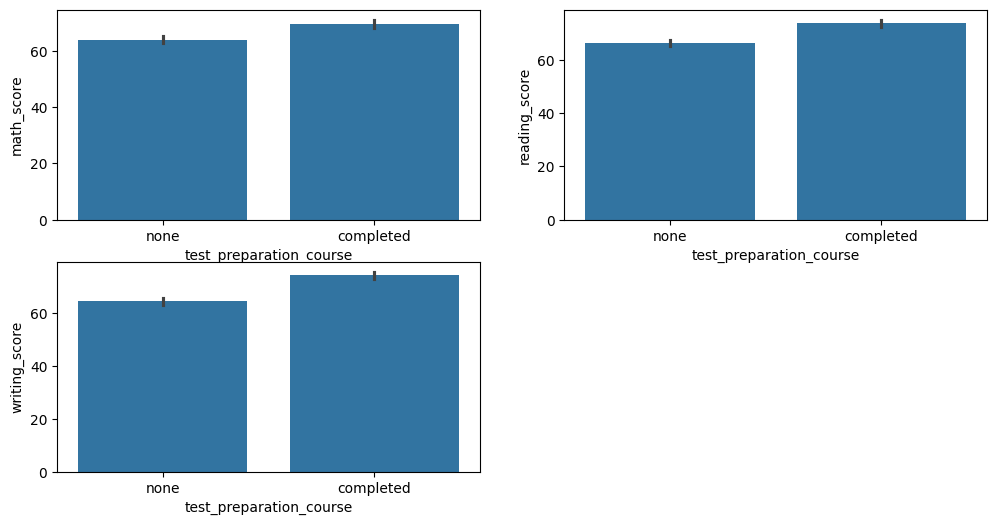

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df["test_preparation_course"], y=df["math_score"])
plt.subplot(2,2,2)
sns.barplot (x=df["test_preparation_course"], y=df["reading_score"])
plt.subplot(2,2,3)
sns.barplot (x=df["test_preparation_course"], y=df["writing_score"])

### Data Distribution
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Insights
- No Missing Values in Data
- No Duplicate Values in Data
- Best Performance - Reading, Worst Performance - Maths
- Most students are in 60-80 Scores range
- Females performed better than Males
- Students provided with Standard Lunch scored better
- Students from Groups - A,B have performed poorly
- Students who had test preparation course scored better

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.